In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
from glob import glob
import io
import re

# Import image processing/reading libraries
import cv2
import matplotlib.pyplot as plt
from skimage import transform
import albumentations as A

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split

import os
import requests
import json
from PIL import Image
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression




# Other libraries
from IPython.display import clear_output

In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans


class Model:
    def __init__(self, X=[], y=[], model_type="linear", params=[]):
        self.X = X
        self.y = y
        if model_type == "linear":
            self.model = LinearRegression()
        elif model_type == "test1":
            self.model = model_type(params[0], params[1], params[2])
        elif model_type == "test2":
            self.model = model_type(params[0], params[1], params[2])

    def split(self, test_size):
        X = np.array(self.X)
        y = np.array(self.y)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=42
        )

    def fit(self):
        self.fitted_model = self.model.fit(self.X_train, self.y_train)
        pickle.dump(self.model, open("saved_model.pkl", "wb"))

    def fit_neighbours(self):
        self.neighbours = KMeans()
        self.fitted_neighbours = self.neighbours.fit(self.X_train)
        pickle.dump(self.neighbours, open("saved_neigbours.pkl", "wb"))

    def predict_cluster(self, candidate):
        cluster = self.neighbours.predict(candidate)
        return cluster

    def predict(self, new_data=None):
        if type(new_data) != type(None):
            try:
                self.result = self.model.predict(new_data)
            except:
                print("The input is a nd array 1xn")
        else:
            try:
                self.result = self.model.predict(self.X_test)
            except:
                print("No data was likely in the defined instance")
        return self.result

    def save_model(self, model_file="saved_model.pkl"):
        pickle.dump(self.model, open(model_file, "wb"))

    def import_model(self, model_file="saved_model.pkl"):
        self.model = pickle.load(open(model_file, "rb"))


In [3]:
X,y=load_iris(return_X_y=True)
model=Model(X,y,"linear",[])
model.split(0.5)
model.fit()
model.predict()
model.save_model()

In [4]:
model.predict(np.array([2,3,4,5]).reshape(1,4))

array([3.35093103])

In [4]:
model.fit_neighbours()

In [14]:
model.neighbours.labels_.shape

(75,)

([<matplotlib.axis.XTick at 0x7f026bdd6490>], [Text(1, 0, 'asd')])

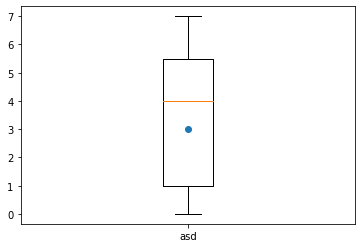

In [41]:
temp=pd.DataFrame(model.neighbours.labels_,columns=["asd"])
plt.boxplot(temp)
plt.scatter(1,3)
plt.xticks(ticks=[1],labels=["asd"])

In [36]:
model2=Model()
model2.import_model()
X,y=load_iris(return_X_y=True)
model2.predict()

No data was likely in the defined instance


In [9]:
input_data={"data":[0,1,2,3,4]}
response = requests.get("http://localhost:8000/prediction",params=input_data)
response.content
json.loads(response.content)["data"]

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [23]:
file = open("sample_image.png", "wb")
file.write(response.content)
file.close()

In [24]:
X,y=load_iris(return_X_y=True,as_frame=True)

In [25]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
pd.read_csv("candidate.csv")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [5]:
input_data=pd.read_csv("candidate.csv")
input_data = {
                "columns": ",".join([a for a in input_data.columns]),
                "values": ",".join([str(a) for a in input_data.iloc[0, :]]),
            }
response = requests.get(
                "http://localhost:8000/post_data",input_data
            )
input_data={"variable":"petal length (cm)"}
response = requests.get("http://localhost:8000/get_data",input_data)
file = open("sample_image.png", "wb")
file.write(response.content)
file.close()

In [6]:
input_data=pd.read_csv("candidate.csv")
input_data = {
                "columns": ",".join([a for a in input_data.columns]),
                "values": ",".join([str(a) for a in input_data.iloc[0, :]]),
            }
response = requests.get(
                "http://localhost:8000/post_data",input_data
            )
response.content

b'{"hello": "world"}'

In [6]:
columns="sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)"
values= '5.1,3.5,1.4,0.2'
values = np.array([float(a) for a in values.split(",")])
values = values.reshape(1, values.shape[0])
candidate = pd.DataFrame(values, columns=columns.split(","))
candidate

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [7]:
np.array(candidate)

array([[5.1, 3.5, 1.4, 0.2]])

In [11]:
import dash_core_components as dcc
dcc.Graph()

In [7]:
response = requests.get("http://localhost:8000/prediction")
response.content

b'{"prediction": [-0.09000348051310209]}'

In [18]:
json.loads(response.content)["prediction"][0]

-0.09000348051310209